<a href="https://colab.research.google.com/github/vrinda-vijay/CODSOFT/blob/main/movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df_test=pd.read_csv('/content/test_data.txt',sep=":::",header=0,engine='python')
df_train=pd.read_csv('/content/train_data.txt',sep=":::",header=0,engine='python')
df_train.columns=['SN','movie_name','category','confession']
df_test.columns=['SN','movie_name','confession']

In [ ]:
df_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [ ]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   movie_name  54213 non-null  object
 2   category    54213 non-null  object
 3   confession  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [ ]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [ ]:
df_train.isnull().sum()

SN            0
movie_name    0
category      0
confession    0
dtype: int64

In [ ]:
df_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [ ]:
df_train.count()

SN            54213
movie_name    54213
category      54213
confession    54213
dtype: int64

In [ ]:
df_test.count()

SN            54199
movie_name    54199
confession    54199
dtype: int64

In [ ]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [ ]:
df_train.shape

(54213, 4)

In [ ]:
df_test.shape

(54199, 3)

**VISUALIZATION OF DATA**

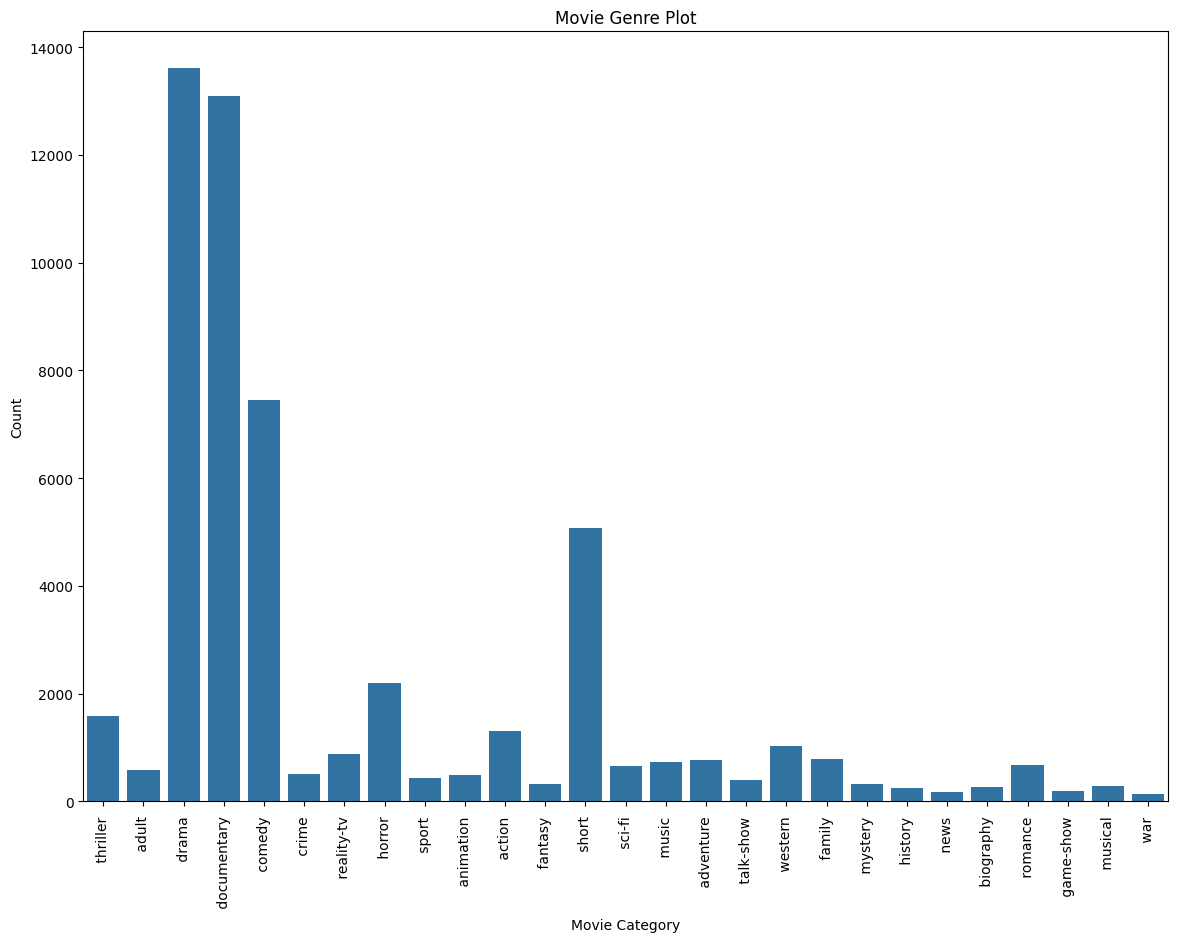

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x='category',data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

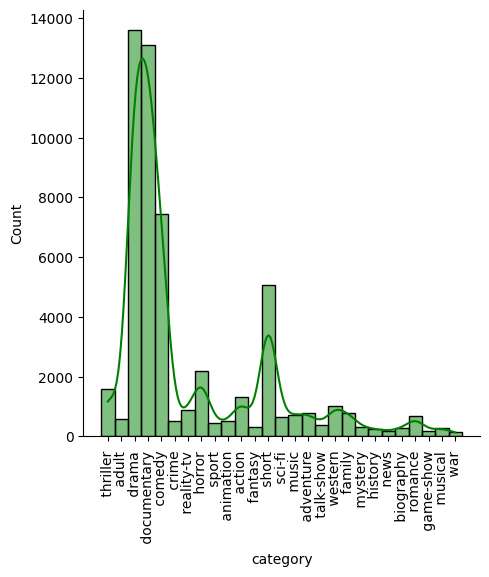

In [ ]:
sns.displot(df_train.category,kde=True,color='Green')
plt.xticks(rotation=90);

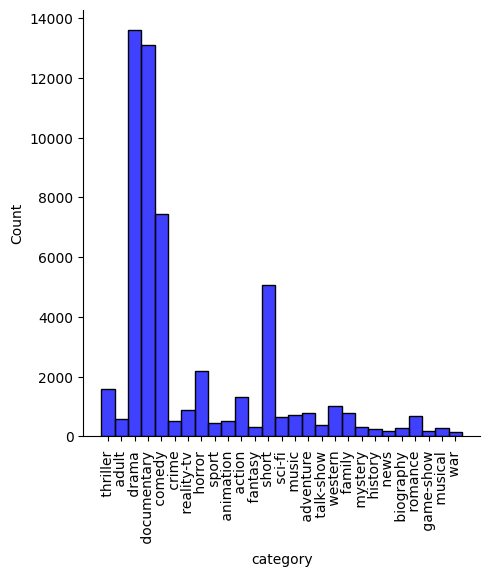

In [ ]:
sns.displot(df_train.category,kde=False,color='blue')
plt.xticks(rotation=90);

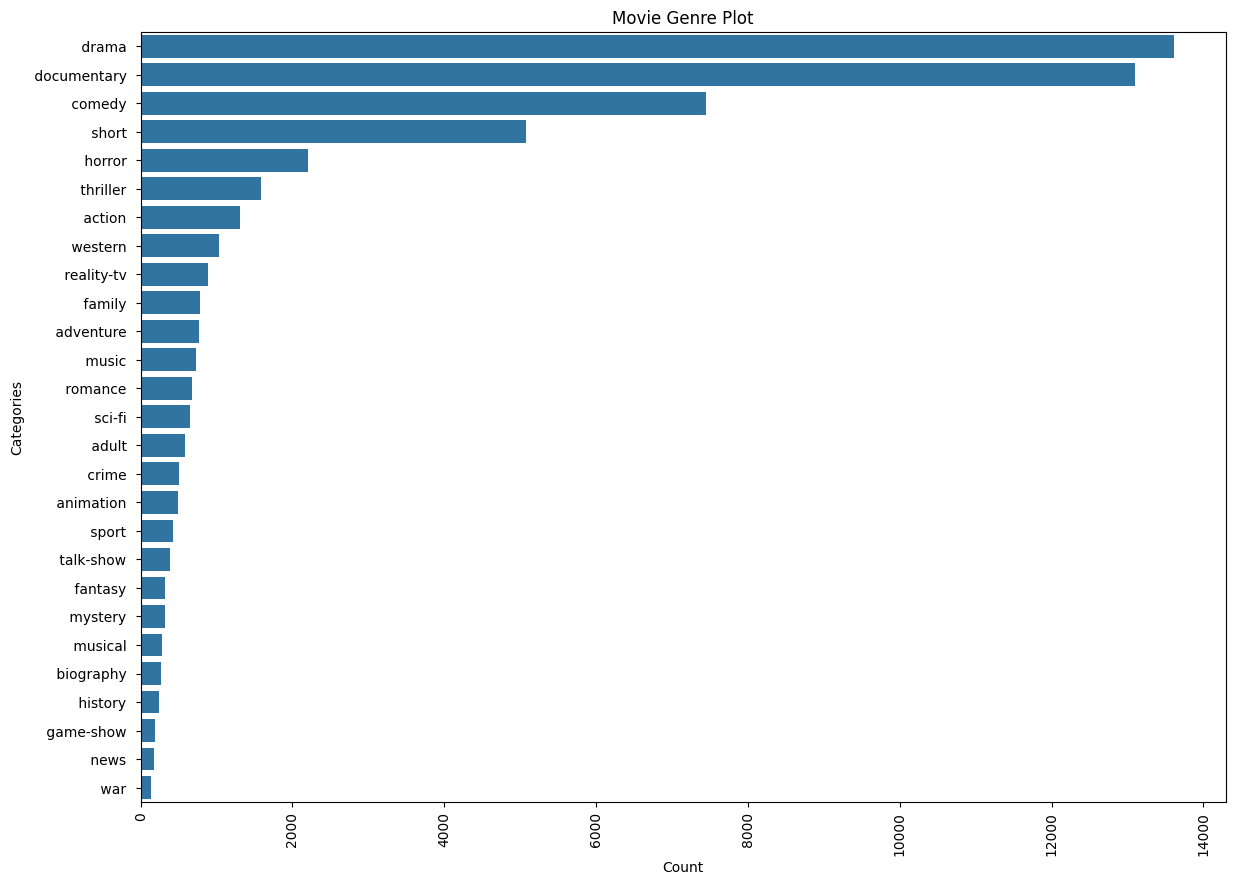

In [ ]:
plt.figure(figsize=(14,10))
count1=df_train.category.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

In [ ]:
data_frame=pd.concat([df_train,df_test],axis=0)
data_frame

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
...,...,...,...,...
54194,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
data_frame.shape

(108412, 4)

In [ ]:
data_frame.isnull().sum()

SN                0
movie_name        0
category      54199
confession        0
dtype: int64

In [ ]:
data_frame.count()

SN            108412
movie_name    108412
category       54213
confession    108412
dtype: int64

In [ ]:
lab=LabelEncoder()
data_frame['category']=lab.fit_transform(data_frame['category'].values)
data_frame['movie_name']=lab.fit_transform(data_frame['movie_name'].values)

In [ ]:
data_frame.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [ ]:
a=data_frame['category'].mean()
data_frame['category'].fillna(a,inplace=True)

In [ ]:
data_frame.count()

SN            108412
movie_name    108412
category      108412
confession    108412
dtype: int64

In [ ]:
data_frame.duplicated().values.any()

False

**PREPROCESS THE DATA**

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
x=vectorizer.fit_transform(data_frame['confession'])

In [ ]:
data_frame.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [ ]:
y=data_frame['category']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


**TRAIN NAIVE BAYES CLASSIFIER**

In [ ]:
naive_bayes_model=MultinomialNB()
naive_bayes_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=naive_bayes_model.predict(x_test)
y_pred

array([27, 27, 27, ..., 27, 27, 27])

In [ ]:
y_test

2540     27
34096    27
53456     5
48931    21
39301     8
         ..
52645    27
33347    27
736      27
27455     5
48691    27
Name: category, Length: 32524, dtype: int64

In [ ]:
print("Naive Bayes Model: ")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))

Naive Bayes Model: 
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   365]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   185]
 [    0     0     0     0     0     2     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   228]
 [    0     0     0     0     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   135]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    66]
 [    0     0     0     0     0    21     0     0     2     0     0     0
      0     0     0     0     0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN LOGISTIC REGRESSION MODEL

In [ ]:
reg_model=LogisticRegression()
reg_model.fit(x_train,y_train)
lr_pred=reg_model.predict(x_test)
lr_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([27, 27, 27, ..., 27, 27, 27])

In [ ]:
y_test

2540     27
34096    27
53456     5
48931    21
39301     8
         ..
52645    27
33347    27
736      27
27455     5
48691    27
Name: category, Length: 32524, dtype: int64

In [ ]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy : ",accuracy_score(y_test,lr_pred))
print("R2 Score :",r2_score(y_test,lr_pred))

Logistic Regression Model: 
[[    8     0     0     0     0     0     0     0     8     0     0     0
      0     1     0     0     0     0     0     0     0     0     0     0
      0     0     0   348]
 [    0     2     0     0     0     1     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     1     0     0
      0     0     0   180]
 [    0     0     2     0     0     1     0     2     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   225]
 [    0     0     0     0     0     2     0     1     2     0     0     0
      0     1     0     0     0     0     0     0     0     0     0     0
      0     0     0   130]
 [    0     0     0     0     0     0     0     9     3     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    55]
 [    0     0     0     0     0   196     0     3    37     0     0     0
      0     1     0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
